# Solving ODEs with Euler's Method (Runge Kutta First Order)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler method function: single ODE

In [ ]:
# euler's method for single equation
def eulers(ODEfunc, tspan, y0, h):
    #t should return an array of values between tspan[0] and tspan[1] with step size h
    t = ### YOUR CODE HERE ###
    y = ### YOUR CODE HERE ### #initialize y array to be filled in with for loop
    y[0] = ### YOUR CODE HERE ### #initial condition
    #loop through t and calculate y[i+1] using y[i]
    for i in ### YOUR CODE HERE###:
        y[i+1] = ### YOUR CODE HERE ###    
    return t, y



## Examples: simple polynomial

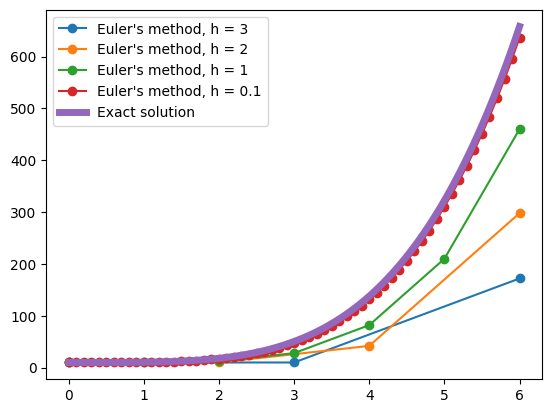

In [43]:

def ODEfuncSimple(t, y): return (2*t ** 3)

tspan = np.array([0, 6])  # range of t
y0 = 10  # initial condition
t1, y1 = eulers(ODEfuncSimple, tspan, y0, 3)
plt.plot(t1, y1.T, "o-", label="Euler's method, h = 3")
t2, y2 = eulers(ODEfuncSimple, tspan, y0, 2)
plt.plot(t2, y2.T, "o-", label="Euler's method, h = 2")
t3, y3 = eulers(ODEfuncSimple, tspan, y0, 1)
plt.plot(t3, y3.T, "o-", label="Euler's method, h = 1")
t4, y4 = eulers(ODEfuncSimple, tspan, y0, 0.1)
plt.plot(t4, y4.T, "o-", label="Euler's method, h = 0.1")


t = np.linspace(0, 6, 100) #get smooth values for exact solution
plt.plot(t, .5 * t**4 + y0, label="Exact solution", linewidth = 5)
plt.legend()
plt.show()

## Examples: $\frac{dy}{dt}=\frac{t}{y}$

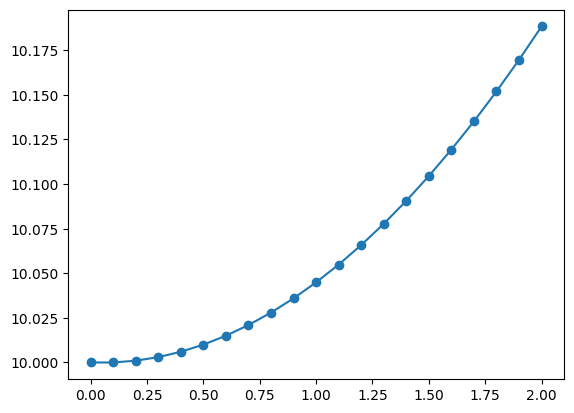

In [25]:

def ODEfunc(t, y): return t/y


tspan = np.array([0, 2])
y0 = 10
h = 0.1
t, y = eulers(ODEfunc, tspan, y0, h)
plt.plot(t, y, "o-")

plt.show()

Let's add some code to visualize the slope field (dy/dt = t/y) and see how our solution looks compared to these arrows.

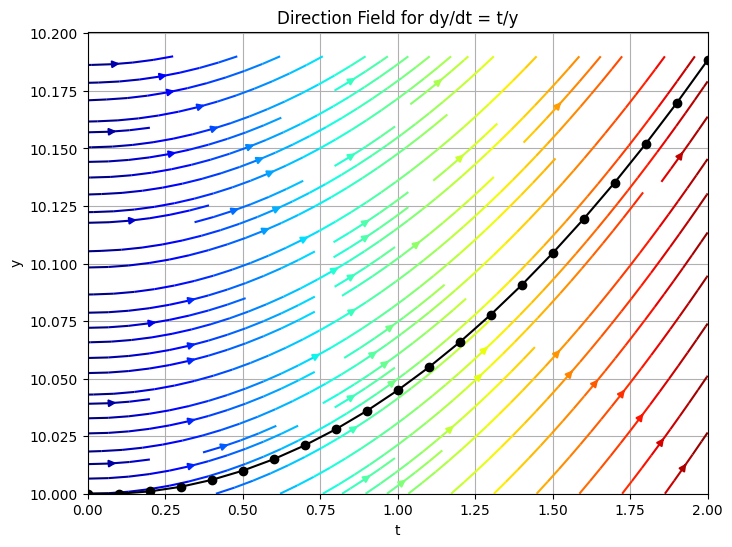

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
ny = 0.01
y_slopes = np.arange(10, 10.2, ny)   # y-axis (dependent variable)
T, Y = np.meshgrid(t, y_slopes)

# Avoid division by zero
Y[Y == 0] = 1e-5

# Get slope field from ODE
# t component is 1; y component is scaled by our ODE to return a vector in the direction of the slope
dy = ODEfunc(T, Y)
dt = np.ones_like(dy)  

# Plot direction field
plt.figure(figsize=(8, 6))
plt.streamplot(T, Y, dt, dy, color=dy, cmap='jet', density=1, arrowsize=1)
plt.plot(t, y, "o-", c = "k")

plt.title("Direction Field for dy/dt = t/y")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)

plt.show()

## Example: $\frac{dy}{dt}=-0.5y$

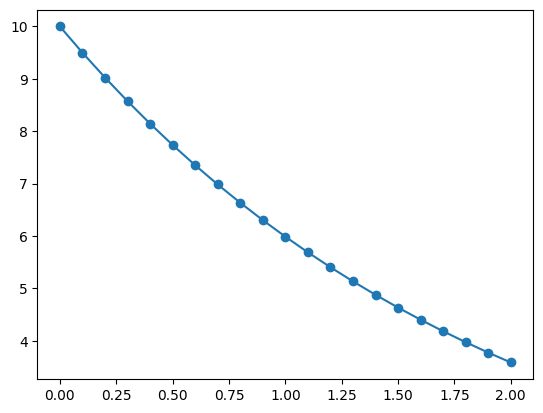

In [45]:

def ODEfuncSingle(t, y): return -0.5*y


tspan = np.array([0, 2])  # range of t
y0 = 10  # initial condition
h = 0.1
t, y = eulers(ODEfuncSingle, tspan, y0, h)
plt.plot(t, y.T, "o-")
plt.show()

And plotting this over the slope field looks like:

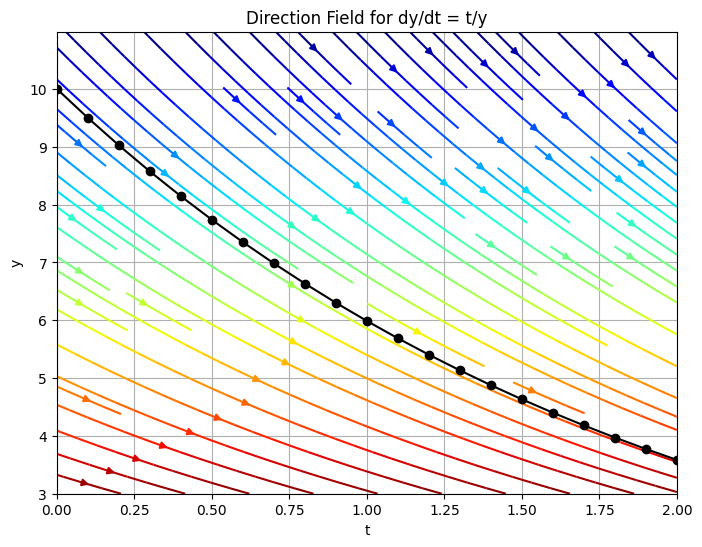

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
ny = 0.01
y_slopes = np.arange(3, 11, ny)   # y-axis (dependent variable)
T, Y = np.meshgrid(t, y_slopes)

# Get slope field from ODE
dy = ODEfuncSingle(T, Y)
dt = np.ones_like(dy)  # t component is 1

# Plot direction field
plt.figure(figsize=(8, 6))
plt.streamplot(T, Y, dt, dy, color=dy, cmap='jet', density=1, arrowsize=1)
plt.plot(t, y, "o-", c = "k")

plt.title("Direction Field for dy/dt = -0.5y")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)

plt.show()

<div class="alert alert-warning">
Note that in the problem set, you will need to adapt this code to work for a system of equations; otherwise the tests may give errors. 
</div> 

# Solving  ODEs with the Midpoint Method

Write a new function, `midpoint(ODEfunc, tspan, y0, h)`, that implements the midpoint method for a given ODE.